In [1]:
import pandas as pd, numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist

## Load the data

In [2]:
# Load the dataset and summarize
dataset_url = r"http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
col_names = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Class']
iris_df =  pd.read_csv(dataset_url, names = col_names)
print(f"Iris dataset loaded with [{', '.join(iris_df.Class.unique())}] classes. \n\nFeatures Summary below: ")
iris_df.describe()

Iris dataset loaded with [Iris-setosa, Iris-versicolor, Iris-virginica] classes. 

Features Summary below: 


,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


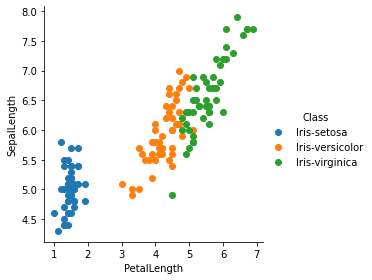

In [3]:
# Scatter Plot of the features SepalLength and PetalLength
grid = sns.FacetGrid(iris_df, hue ="Class", height = 4)
grid.map(plt.scatter, 'PetalLength', 'SepalLength').add_legend()

In [4]:
# Seperate Features and Targets
iris_features = iris_df[iris_df.columns[:4]].to_numpy()
iris_labels = iris_df['Class'].to_numpy()

# K-Means Algorithm

In [6]:
def calc_distance(point1, point2, axis=None):
    return np.sqrt((np.power(point1-point2, 2)).sum(axis=axis))

In [8]:
class Kmeans():

    def __init__(self, n_clusters, max_iter=100, tol=1e-2, random_state=None):
        self.n_clusters = n_clusters
        self.__max_iter = max_iter
        self.__tol = tol
        self.__random_state = random_state
        if self.__random_state:
            np.random.set_state(random_state)
        self.__flag_fit = False
        self.clusters = None
        
    def _init_clusters_(self):
        indices = np.linspace(0, len(self._X)-1, len(self._X), dtype=int)
        self._idx_centers = np.random.choice(indices, size=self.n_clusters)
        self.cluster_centers = self._X[self._idx_centers]
        self._init_data_to_clusters_()

    def _update_clusters_(self):
        if self.clusters is None:
            print("Data not loaded into clusters. Call _init_clusters_")
            return
        for i in range(self.n_clusters):
            self.cluster_centers[i] = np.mean(self.clusters[i], axis=0)
        self._init_data_to_clusters_()
        
        
    def _init_data_to_clusters_(self):
        clusters_list = [[] for i in range(self.n_clusters)]
        for feature in self._X:
            curr_cluster_index = -1
            min_distance = np.inf
            for idx, center in enumerate(self.cluster_centers):
                curr_distance = calc_distance(feature, center)
                if curr_distance < min_distance:
                    min_distance = curr_distance
                    curr_cluster_index = idx
            if curr_cluster_index == -1:
                print(f"Cluster couldnt be identified for {feature}")
                return
            clusters_list[curr_cluster_index].append(feature)
        self.clusters = np.array(clusters_list, dtype=object)
        return self
    
    def fit(self, X_data, y_data):
        self._X = X_data
        self._y = y_data
        self._init_clusters_()
        for i in range(self.__max_iter):
            old_cluster_centers = self.cluster_centers.copy()
            self._update_clusters_()
            distance = calc_distance(old_cluster_centers, self.cluster_centers, axis=1)
            if i == 0:
                prev_max_distance = np.max(distance)
                continue
            else:
                curr_max_distance = np.max(distance)
                change_diff = abs(((curr_max_distance - prev_max_distance))/ \
                                  np.mean([prev_max_distance, curr_max_distance]))
                prev_max_distance = curr_max_distance
            if change_diff < self.__tol or np.isnan(change_diff):
                break
        self.__flag_fit = True
        
    def predict(self, X_data):
        if not self.__flag_fit:
            print("Model not fit with data yet! run model.fit() before running predict")
        self._get_class_labels_()
        return np.apply_along_axis(self.__predict_data__, axis=1, arr=X_data)
        
    def __predict_data__(self, data):
        return self.dict_labels.get(np.argmax(calc_distance(self.cluster_centers, data, axis=1)), 0)
    
    def get_accuracy(self, labels_predicted):
        return 2*np.mean(np.equal(labels_predicted, iris_labels).astype(int))*100
    
    def _init_plot_(self, title):
        plt.figure(figsize=(16,6))
        plt.subplot(1,2,1)
        plt.title(title)
        return plt
    
    def _get_class_labels_(self):
        list_features = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
        dict_labels = dict(zip(list_features, range(3)))
        cluster_labels = [[] for i in range(self.n_clusters)]
        for feature, label in zip(self._X, self._y):
            min_dist = np.inf
            min_idx = -10
            for i, center in enumerate(self.cluster_centers):
                curr_dist = calc_distance(center, feature)
                if curr_dist < min_dist:
                    min_dist = curr_dist
                    min_idx = i
            cluster_labels[min_idx].append(dict_labels[label])        
        estimated_labels = [np.argmax(np.bincount(i)) for i in cluster_labels]
        self.dict_labels = dict(zip(estimated_labels[::-1], list_features))
    
    def plot_clusters(self, title=None):
        if not self.__flag_fit:
            print("Model not fit with data yet! run model.fit() before running plot")
        if title is None:
            title = "Cluster Plot"
        plt = self._init_plot(title)
        for i, class_name in enumerate(classname_to_label.keys()):
            plt.scatter(features[labels_count==i,2],features[labels_count==i,3],c=colors[i,None],alpha=1.0,s=20,lw=0,label=class_name)

## Building the KMeans model for Iris Dataset

### Choosing the number of clusters

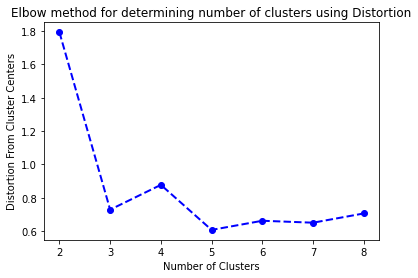

In [10]:
# Elbow Method
np.random.seed(0)
list_clusters = list(range(2, 9))
distortion_from_centers = []

for n_cluster in  list_clusters:
    indices = np.linspace(0, len(iris_features)-1, len(iris_features), dtype=int)
    idx_centers = np.random.choice(indices, size=n_cluster)
    cluster_centers = iris_features[idx_centers]
    distance_center = cdist(XA=iris_features, XB=cluster_centers)
    minimum_dist_sum = np.sum(np.min(distance_center, axis=1))
    distortion_from_centers.append(minimum_dist_sum/iris_features.shape[0])

plt.plot(list_clusters, distortion_from_centers, 'bo--', lw=2)
plt.title("Elbow method for determining number of clusters using Distortion")
plt.xlabel("Number of Clusters")
plt.ylabel("Distortion From Cluster Centers")
plt.show()

### KMeans Model with 3 clusters

In [11]:
np.random.seed(25)
model = Kmeans(n_clusters=3, max_iter=10)

In [12]:
model.fit(iris_features, iris_labels)

In [13]:
model.cluster_centers

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [14]:
model._get_class_labels_()

In [15]:
model.dict_labels

{2: 'Iris-setosa', 0: 'Iris-versicolor', 1: 'Iris-virginica'}

In [17]:
# predictions on test data
labels_predicted = model.predict(iris_features)
# Accuracy of KMeans model on testing dataset
accuracy = model.get_accuracy(labels_predicted)
print(f"Accuracy of classifications on testing data : {round(accuracy, 2)}%")

Accuracy of classifications on testing data : 66.67%
